In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/home/beans/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from loaders import *
from constants import *
from imports import *
from models import *
from viz_utils import *
torch.__version__

'1.13.1'

In [14]:
%%time
bs = 6
loader = TrnLoader(bs=bs, bptt=1, seqlen=21) # 1200

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been depreca

waiting for chunk


/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


waiting for chunk
CPU times: user 281 ms, sys: 3.49 s, total: 3.77 s
Wall time: 14 s


Process Process-13:
Process Process-12:
Process Process-11:
Process Process-15:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-16:
Process Process-14:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-9:
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-10:
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.p

In [15]:
#loader.cleanup()

In [16]:
%%time
batch = loader.get_batch()
img, aux, wps, (to_pred_mask, is_first_in_seq) = batch

CPU times: user 344 ms, sys: 82.9 ms, total: 427 ms
Wall time: 49.8 ms


In [17]:
img.shape, is_first_in_seq

(torch.Size([6, 1, 3, 360, 1440]), True)

In [18]:
img.dtype, aux.dtype, wps.dtype, to_pred_mask.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

In [19]:
import copy # save this code, it's useful for repairing broken batchnorm stats
m = EffNet().to(device) 
model_stem = "6.1_e45"
m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m{model_stem}.torch"), strict=False)
m.use_rnn = True
m.reset_hidden(bs)

In [24]:
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        model_out = m.forward_cnn(img, aux)

In [25]:
model_out

(tensor([[[ 3.9978e-02,  3.2837e-02,  2.7283e-02,  2.8412e-02,  2.9846e-02,
            3.1494e-02,  3.4882e-02,  3.2379e-02,  3.6774e-02,  4.3945e-02,
            4.8706e-02,  5.3650e-02,  5.8990e-02,  6.3538e-02,  6.7871e-02,
            7.2388e-02,  7.7148e-02,  8.1787e-02,  8.5876e-02,  9.0576e-02,
            1.8274e-01,  2.8076e-01,  3.8989e-01,  5.0684e-01,  6.2646e-01,
            7.6172e-01,  9.4238e-01,  1.2842e+00,  1.7607e+00,  2.2129e+00,
            3.8574e-02,  3.7170e-02,  3.3813e-02,  4.0527e-02,  4.6875e-02,
            5.4565e-02,  6.2683e-02,  7.0862e-02,  7.8735e-02,  8.5571e-02,
            9.2407e-02,  9.8206e-02,  1.0425e-01,  1.0986e-01,  1.1584e-01,
            1.2219e-01,  1.2903e-01,  1.3599e-01,  1.4355e-01,  1.5063e-01,
            2.7588e-01,  3.9575e-01,  5.2051e-01,  6.8750e-01,  8.3789e-01,
            1.1895e+00,  2.1699e+00,  3.6777e+00,  4.5898e+00,  4.6719e+00,
            9.9243e-02,  1.1359e-01,  1.4331e-01,  1.8127e-01,  2.1899e-01,
            

In [26]:
wps_p, aux_targets_p, obsnet_out = model_out

In [27]:
wps_p.dtype, aux_targets_p.dtype, obsnet_out.dtype

(torch.float16, torch.float16, torch.float16)

In [34]:
t = torch.randn((3,4,5))
t[0,0,0] = torch.inf
t.max().item()

inf

In [36]:
2**16

65536

In [65]:
# Only batch
m.train()
for n, mm in m.backbone.named_modules():
    if type(mm) == nn.BatchNorm2d: 
        mm.momentum = 1 #.4

In [75]:


with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        model_out= m.forward_cnn(img, aux)

0 isnan:0 max:110.75 min:-123.625 std:7.2421875 mean:-0.291748046875 torch.Size([6, 48, 180, 720])
1 isnan:0 max:169.875 min:-184.875 std:5.0703125 mean:3.541015625 torch.Size([6, 48, 180, 720])
2 isnan:0 max:169.875 min:-0.278564453125 std:4.48828125 mean:3.859375 torch.Size([6, 48, 180, 720])
3 isnan:0 max:364.25 min:-788.0 std:15.4765625 mean:-1.3525390625 torch.Size([6, 24, 180, 720])
4 isnan:0 max:3852.0 min:-2612.0 std:23.75 mean:-1.2626953125 torch.Size([6, 32, 90, 360])
5 isnan:0 max:243.5 min:-198.375 std:18.6875 mean:-1.154296875 torch.Size([6, 56, 45, 180])
6 isnan:0 max:481.5 min:-429.75 std:16.03125 mean:0.222412109375 torch.Size([6, 112, 23, 90])
7 isnan:0 max:525.5 min:-455.0 std:15.2421875 mean:-0.268310546875 torch.Size([6, 160, 23, 90])
8 isnan:0 max:252.25 min:-276.0 std:15.140625 mean:-0.44091796875 torch.Size([6, 272, 12, 45])
9 isnan:0 max:1393.0 min:-876.5 std:6.9453125 mean:0.03131103515625 torch.Size([6, 448, 12, 45])
10 isnan:0 max:3748.0 min:-8288.0 std:195.6

In [15]:
m.eval()
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        model_out= m.forward_cnn(img, aux)

0 isnan:0 max:110.75 min:-123.625 std:7.2421875 mean:-0.291748046875 torch.Size([6, 48, 180, 720])
1 isnan:0 max:169.875 min:-184.75 std:5.0703125 mean:3.541015625 torch.Size([6, 48, 180, 720])
2 isnan:0 max:169.875 min:-0.278564453125 std:4.48828125 mean:3.859375 torch.Size([6, 48, 180, 720])
3 isnan:0 max:364.25 min:-788.5 std:15.4765625 mean:-1.3525390625 torch.Size([6, 24, 180, 720])
4 isnan:0 max:3840.0 min:-2604.0 std:23.75 mean:-1.26171875 torch.Size([6, 32, 90, 360])
5 isnan:2721600 max:nan min:nan std:nan mean:nan torch.Size([6, 56, 45, 180])
6 isnan:1391040 max:nan min:nan std:nan mean:nan torch.Size([6, 112, 23, 90])
7 isnan:1987200 max:nan min:nan std:nan mean:nan torch.Size([6, 160, 23, 90])
8 isnan:881280 max:nan min:nan std:nan mean:nan torch.Size([6, 272, 12, 45])
9 isnan:1451520 max:nan min:nan std:nan mean:nan torch.Size([6, 448, 12, 45])
10 isnan:5806080 max:nan min:nan std:nan mean:nan torch.Size([6, 1792, 12, 45])
11 isnan:5806080 max:nan min:nan std:nan mean:nan t

In [22]:
(torch.isfinite(model_out[0])==False).sum()

tensor(900, device='cuda:0')

In [23]:
for n,p in m.named_parameters():
    if 'bn' in n:
        print(p.max().item(), p.min().item())

11.299417495727539 -4.766486167907715
12.774751663208008 -3.2494428157806396
10.586363792419434 -9.459186553955078
25.159915924072266 -5.991991996765137
24.927871704101562 0.3959149122238159
6.257737636566162 -5.710150718688965
8.76262092590332 -1.716371774673462
14.154952049255371 -3.533397912979126
21.79184341430664 6.644256591796875
12.606802940368652 -7.765071392059326
14.90018367767334 -1.3504974842071533
9.669706344604492 -7.37543249130249
17.53268814086914 -5.1773223876953125
22.177072525024414 -7.453976631164551
20.872995376586914 7.900251388549805
0.5253699421882629 -0.47232091426849365
6.397983551025391 -2.982454776763916
7.574643135070801 -6.85050106048584
9.329272270202637 -0.3164241313934326
13.986002922058105 -5.827029228210449
13.809124946594238 3.648577928543091
6.461241722106934 -21.478654861450195
7.509788990020752 -1.778420090675354
7.597029209136963 -7.848921775817871
13.510541915893555 -3.6780381202697754
8.0377836227417 -13.828116416931152
20.11961555480957 3.3650

In [18]:
model_out

(tensor([[[ 3.0823e-02,  3.1799e-02,  3.0716e-02,  3.0228e-02,  2.9099e-02,
            2.8412e-02,  2.7405e-02,  2.6550e-02,  2.5818e-02,  2.5055e-02,
            2.4506e-02,  2.3727e-02,  2.3102e-02,  2.2598e-02,  2.1744e-02,
            2.1027e-02,  2.0157e-02,  1.9455e-02,  1.8677e-02,  1.7899e-02,
            2.0325e-02,  2.0081e-02,  1.5533e-02,  1.6953e-02,  1.9058e-02,
            2.0996e-02,  2.9587e-02,  3.8025e-02,  3.4271e-02, -1.1536e-02,
            3.0762e-02,  2.8793e-02,  2.7451e-02,  2.6062e-02,  2.4826e-02,
            2.3773e-02,  2.2644e-02,  2.1637e-02,  2.0493e-02,  1.9424e-02,
            1.8448e-02,  1.7578e-02,  1.6571e-02,  1.5549e-02,  1.4740e-02,
            1.3885e-02,  1.2955e-02,  1.1887e-02,  1.0941e-02,  9.8572e-03,
            1.4847e-02,  6.3934e-03,  3.1128e-03,  1.0811e-02,  2.3849e-02,
            4.2450e-02,  5.8228e-02,  3.1403e-02, -1.2341e-01, -2.4341e-01,
            4.3701e-02,  4.1351e-02,  3.7476e-02,  3.3752e-02,  3.0945e-02,
            

In [33]:

e = enrich_img(img=unprep_img(img[0,0, :3,:,:]), wps_p=unprep_wps(wps[0,0,:]), aux=unprep_aux(aux[0,0,:]))

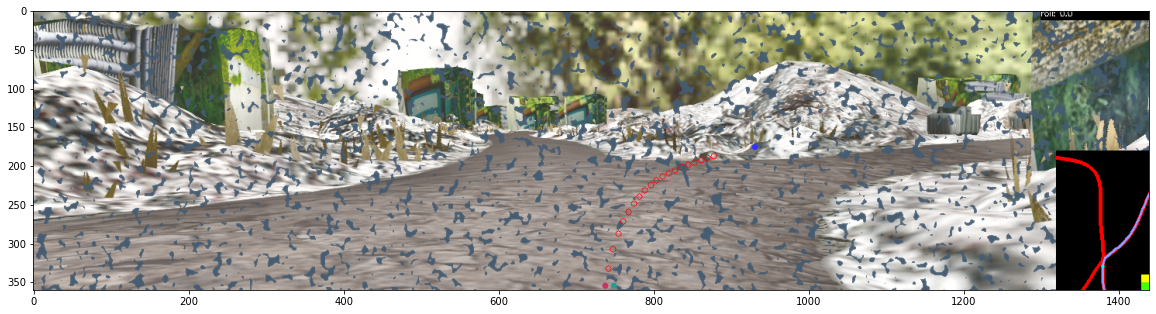

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(e)

In [86]:
img.shape, aux.shape, wps.shape, is_first_in_seq

(torch.Size([6, 1, 4, 360, 1440]),
 torch.Size([6, 1, 39]),
 torch.Size([6, 1, 150]),
 True)

In [5]:
from norm import *
b_ix = 0
s_ix = 0
_img = (denorm_img(img[b_ix][s_ix].permute(1,2,0).detach().cpu().numpy()) * 255).astype('uint8')
_img.shape

(360, 1440, 4)

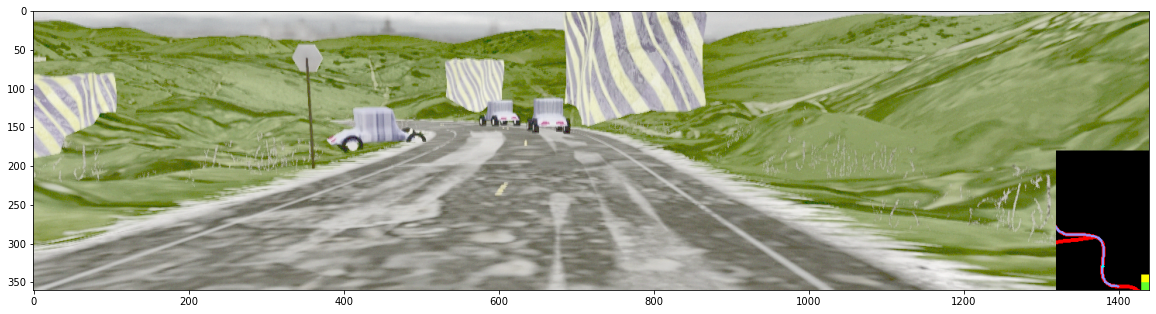

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(_img[:,:,:3])

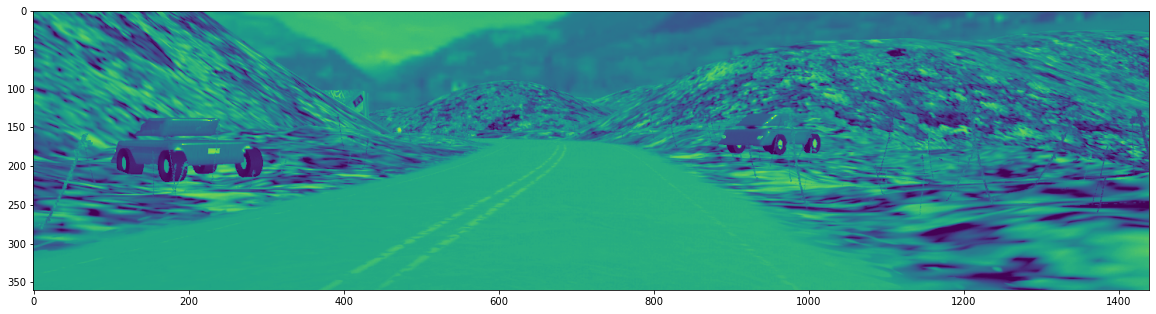

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(_img[:,:,3:])

In [10]:
m = EffNet().to(device) 
model_stem = "" #"1.23_e199"
m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m{model_stem}.torch"), strict=False)
m.save_backbone_out = True
m.set_for_viz() # comment out hooks in model to test this path
m.eval()
sum([torch.numel(p) for p in m.parameters()]) / 1000

RuntimeError: Error(s) in loading state_dict for EffNet:
	size mismatch for backbone.conv_stem.weight: copying a param with shape torch.Size([48, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([48, 4, 3, 3]).

In [6]:
actgrad = get_actgrad(m, img, aux_model, aux_calib, actgrad_target='traj')
actgrad.shape

(360, 1440, 1)

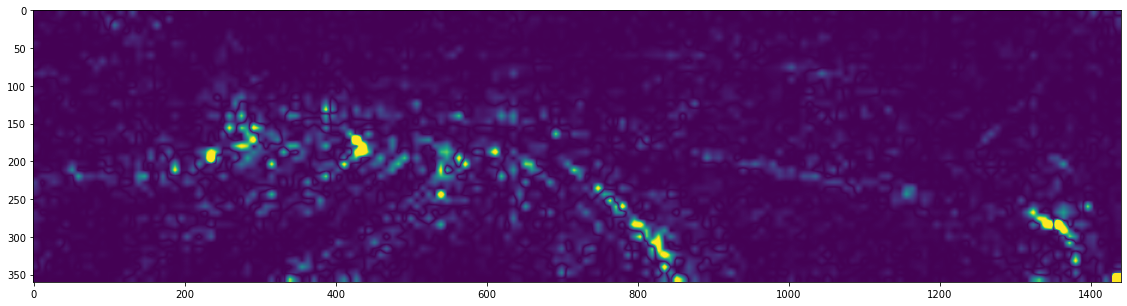

In [7]:
plt.figure(figsize=(20,5))
plt.imshow(actgrad.astype(np.float32))

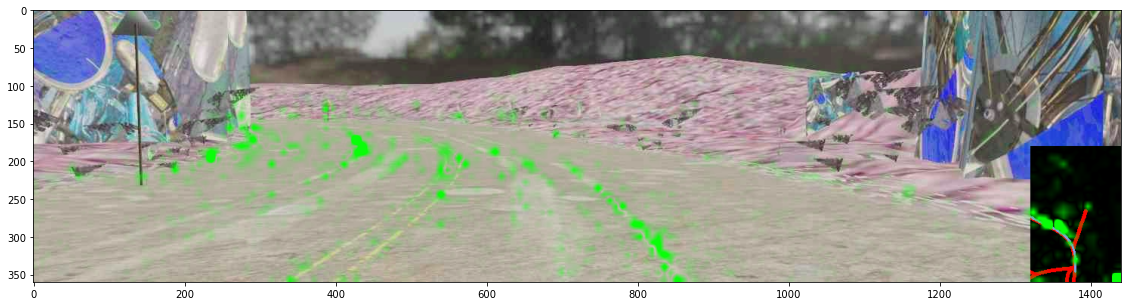

In [8]:
img_actgrad = combine_img_actgrad(_img[:,:,:3], actgrad)
plt.figure(figsize=(20,5))
plt.imshow(img_actgrad)

In [9]:
m

EffNet(
  (backbone): Sequential(
    (0): Conv2d(4, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
    (3): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    

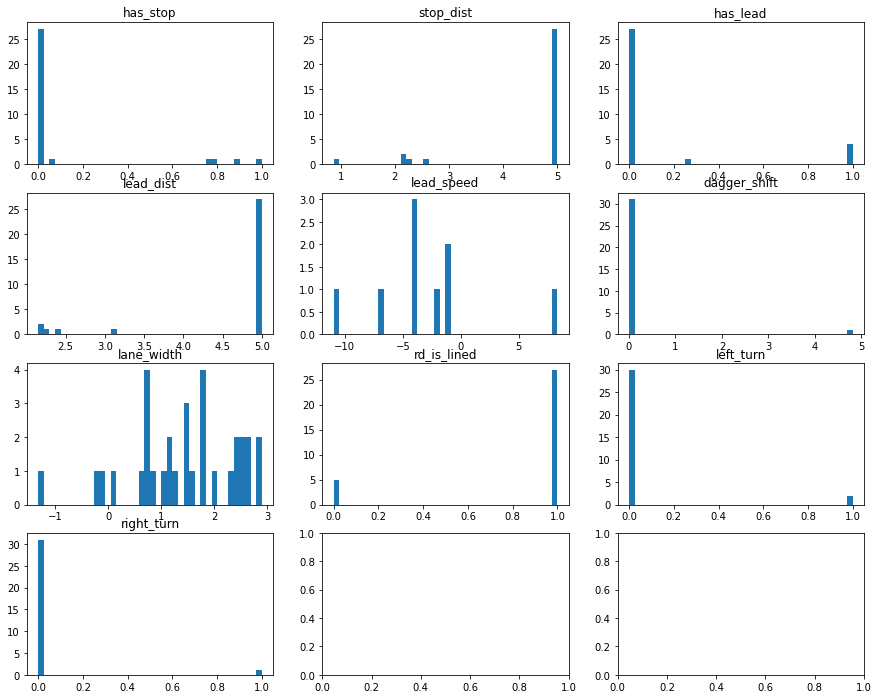

In [4]:
aux_np = na(aux.detach().cpu().numpy(), AUX_PROPS)
plot_aux(aux_np, AUX_TARGET_PROPS)

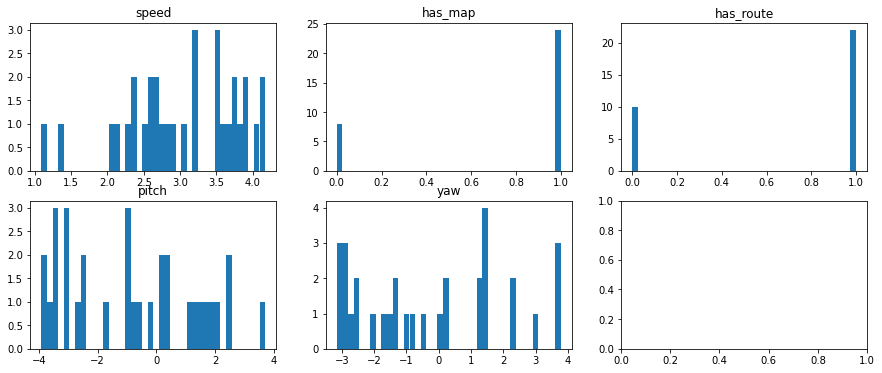

In [5]:
plot_aux(aux_np, AUX_MODEL_PROPS)

In [6]:
wp_angles, wp_headings, wp_curvatures, wp_rolls, wp_zs = np.split(wps.detach().cpu().numpy(), 5, -1)
wp_angles.shape, wp_headings.shape, wp_curvatures.shape, wp_rolls.shape, wp_zs.shape

((32, 1, 30), (32, 1, 30), (32, 1, 30), (32, 1, 30), (32, 1, 30))

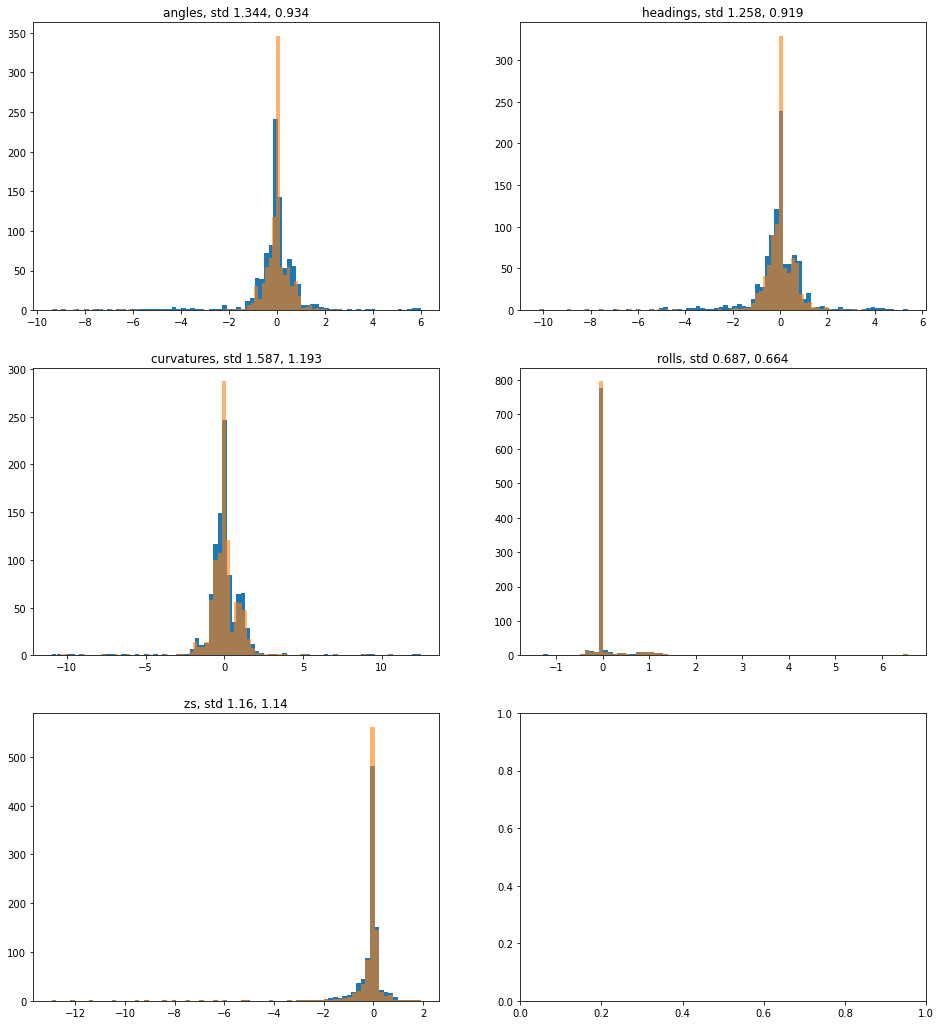

In [7]:
plot_wps([wp_angles, wp_headings, wp_curvatures, wp_rolls, wp_zs], to_pred_mask.detach().cpu().numpy())

In [8]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.8781, device='cuda:0')

In [16]:
m.backbone

Sequential(
  (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SiLU(inplace=True)
  (3): Sequential(
    (0): DepthwiseSeparableConv(
      (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
      (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): SiLU(inplace=True)
      (se): SqueezeExcite(
        (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
        (act1): SiLU(inplace=True)
        (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
        (gate): Sigmoid()
      )
      (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): Identity()
    )
    (1): DepthwiseSeparableConv(
      (conv_dw): Conv2d(24, 2

In [8]:
m.train()

EffNet(
  (backbone): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
    (3): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    

In [9]:
%%time
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        wps_p, aux_targets_p, obsnet_out  = m(img, aux)

0 isnan:0 max:102.6875 min:-98.625 std:6.234375 mean:0.034576416015625 torch.Size([6, 48, 180, 720])
1 isnan:0 max:237.5 min:-200.125 std:4.73828125 mean:3.333984375 torch.Size([6, 48, 180, 720])
2 isnan:0 max:237.5 min:-0.278564453125 std:4.2265625 mean:3.5703125 torch.Size([6, 48, 180, 720])
3 isnan:0 max:349.0 min:-1176.0 std:13.7734375 mean:-1.1376953125 torch.Size([6, 24, 180, 720])
4 isnan:0 max:1062.0 min:-493.5 std:22.078125 mean:-1.2646484375 torch.Size([6, 32, 90, 360])
5 isnan:0 max:734.0 min:-454.5 std:18.28125 mean:-0.9619140625 torch.Size([6, 56, 45, 180])
6 isnan:0 max:375.5 min:-445.75 std:16.078125 mean:0.2391357421875 torch.Size([6, 112, 23, 90])
7 isnan:0 max:405.25 min:-402.0 std:16.8125 mean:-0.44482421875 torch.Size([6, 160, 23, 90])
8 isnan:0 max:258.5 min:-237.875 std:24.703125 mean:-0.94482421875 torch.Size([6, 272, 12, 45])
9 isnan:0 max:655.0 min:-392.25 std:8.84375 mean:-0.70703125 torch.Size([6, 448, 12, 45])
10 isnan:0 max:54784.0 min:-15128.0 std:879.5 me

In [18]:
aux.mean(), aux.std()

(tensor(3.9688, device='cuda:0', dtype=torch.float16),
 tensor(17.6094, device='cuda:0', dtype=torch.float16))

In [12]:
obsnet_out

tensor([[[nan, nan, nan]],

        [[nan, nan, nan]],

        [[nan, nan, nan]],

        [[nan, nan, nan]],

        [[nan, nan, nan]],

        [[nan, nan, nan]]], device='cuda:0', dtype=torch.float16)

In [31]:
for (n,p) in m.named_parameters():
    if ".bn" in n:
        print(n, p.max().item(), p.min().item(), p.std().item(), p.mean().item())

backbone.3.0.bn1.weight 10.247492790222168 -9.334823608398438 4.19589376449585 3.3274588584899902
backbone.3.0.bn1.bias 24.652915954589844 -5.2129082679748535 5.130411148071289 3.01467227935791
backbone.3.0.bn2.weight 24.931732177734375 0.14150160551071167 7.543893814086914 13.506982803344727
backbone.3.0.bn2.bias 5.976871490478516 -5.3035478591918945 2.6093966960906982 -0.3156040906906128
backbone.3.1.bn1.weight 8.648701667785645 -1.2818788290023804 2.034669876098633 3.5026321411132812
backbone.3.1.bn1.bias 14.378236770629883 -3.3664143085479736 4.873565673828125 4.470156669616699
backbone.3.1.bn2.weight 21.81593132019043 6.6512675285339355 4.2342634201049805 12.082923889160156
backbone.3.1.bn2.bias 12.599742889404297 -7.91371488571167 4.783146381378174 -0.9087821245193481
backbone.4.0.bn1.weight 14.83806037902832 -0.8084381222724915 4.029274940490723 3.910146951675415
backbone.4.0.bn1.bias 9.782878875732422 -7.523768424987793 2.474703788757324 1.5215429067611694
backbone.4.0.bn2.weig

In [23]:
sum([p.isnan().sum().item() for n,p in m.named_parameters()])

0

(array([8.0000e+00, 1.0625e+04, 7.7000e+01, 1.9000e+01, 8.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-0.167  , -0.06714,  0.0327 ,  0.1326 ,  0.2324 ,  0.3323 ,
         0.4321 ,  0.532  ,  0.632  ,  0.7314 ,  0.8315 ], dtype=float16),
 <BarContainer object of 10 artists>)

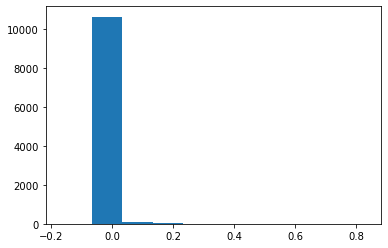

In [30]:
plt.hist(m.backbone_out_acts.detach().cpu().numpy().flatten())

In [28]:
aux.isnan().sum()

tensor(0, device='cuda:0')

In [8]:
m.load_trt_backbone()

In [20]:
# randoms
img = torch.randn((1,1, N_CHANNELS, IMG_HEIGHT, IMG_WIDTH)).to(device)
aux_model = torch.randn((1,1, N_AUX_MODEL_IN)).to(device)
aux_calib = torch.randn((1,1, N_AUX_CALIB_IN)).to(device)

In [19]:
%%time
with torch.no_grad():
    wps_preds, aux_preds, obs_net_out  = m(img, aux_model, aux_calib)

NameError: name 'aux_model' is not defined

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)